In [110]:
import numpy as np
import matplotlib.pyplot as plt

from nopt.transforms.linear_transform import LinearMatrix
from nopt.transforms.fastjlt import FastJLT
from nopt.constraints.sparse import *
from nopt.constraints.rank import *
from nopt.constraints.sparse_oblique import *
from nopt.constraints.oblique import *
from nopt.problems.linear_problem import *
from nopt.problems.linear_problem_sum import *
from nopt.problems.sparse_principal_subspace import *
from nopt.solvers.niht import *
from nopt.solvers.naht import *
from nopt.solvers.oblique_spca import *
from nopt.tests.generate_lsmat1 import *
from nopt.tests.generate_qsmat1 import *

In [111]:
m = 500
n = 500
r = 10
c = 1.5
alpha = 0.15
s = round(c*np.sqrt(n)*r) #round(alpha*n*r)
N = 1000; # number of samples

#s = round(rho_s*n*r)
alpha = s/(n*r)
print(s)
print(alpha)
#r = round(.5*( m+n - np.sqrt( (m+n)**2 - 4*rho_r*p ) ))

335
0.067


In [112]:
q0 = GenerateQSMat1((n,r), s)
q0_noise = q0 + np.random.normal(0, 1, (n, r))

theta = 5; # Signal strength
samples = np.random.multivariate_normal(np.zeros((n,)), np.eye(n) + theta* q0@q0.T, N).T
#covariance matrix = samples @ samples.T / N
A = LinearMatrix(samples.T / np.sqrt(N))
A = LinearMatrix(samples @ samples.T / N)

1.8974834428918905
0.02236028860206419


In [128]:
lam = np.sqrt(s)*n/r
print(lam)
problem = SparsePrincipalSubspace(A, rank = r, sparsity=s, lam=lam)
problem.objective(q0)

915.1502608861563


380.5536514881662

In [129]:
HTr = Rank(r)
subspaces,_ = HTr.project(A._matrix)
HTso = SparseOblique(s)
_, x0 = HTso.project_quasi(subspaces[1])

In [130]:
solver = ObliqueSPCA(logverbosity = 2, maxiter = 10000)
x, opt_log = solver.solve(problem=problem, x=x0)

 iter		   obj. value	    grad. norm
    1	+5.0446019188343450e+02	5.39975955e+02
    2	+4.6851283099313065e+02	2.21381433e+02
    3	+4.6131942551214132e+02	1.36335472e+02
    4	+4.5773896263591894e+02	1.02818490e+02
    5	+4.5764590426162380e+02	8.75369663e+01
    6	+4.5546131083546356e+02	1.06134169e+02
    7	+4.5436914686679955e+02	7.70442437e+01
    8	+4.5354408546327448e+02	7.46801240e+01
    9	+4.5298232589520029e+02	6.07155427e+01
   10	+4.5252795778267108e+02	6.11957394e+01
   11	+4.5215885659515470e+02	5.49182661e+01
   12	+4.5183500705835394e+02	5.61118021e+01
   13	+4.5173910698874749e+02	5.33694606e+01
   14	+4.5134124316571666e+02	5.96787704e+01
   15	+4.5101938178098277e+02	5.32535057e+01
   16	+4.5073542497667285e+02	5.42970542e+01
   17	+4.5048604732592230e+02	5.14722044e+01
   18	+4.5025744184930619e+02	5.25623372e+01
   19	+4.5004737426757845e+02	5.12945081e+01
   20	+4.5001855915310693e+02	5.18914042e+01
   21	+4.4976730417322102e+02	5.36243537e+01
   22	+4.4953811369

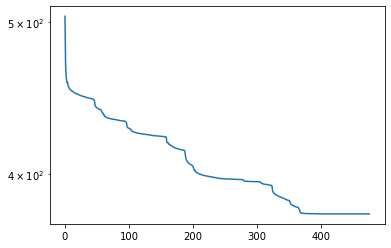

In [131]:
plt.semilogy(opt_log['iterations']['fx'])

0.7257534067831596
0.8335865990805011
0.8321038952335555


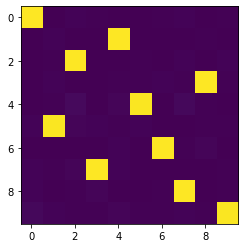

In [132]:
print(1 - problem.objective(x0) / (2*np.linalg.norm(A._matrix,'fro')**2))
print(1 - problem.objective(x) / (2*np.linalg.norm(A._matrix,'fro')**2))
print(1 - problem.objective(q0) / (2*np.linalg.norm(A._matrix,'fro')**2))
if r == 1:
    print(np.linalg.norm( (q0.T @ x) * x - q0))
else:
    plt.imshow(np.abs(q0.T @ x))

In [133]:
(x.T @ x)

array([[ 1.00000000e+00, -1.68580767e-03, -5.30004696e-04,
         6.12357579e-04,  6.96909792e-04,  2.68834839e-04,
         2.35948410e-03,  3.84233439e-03,  3.42414106e-04,
        -5.81924645e-03],
       [-1.68580767e-03,  1.00000000e+00,  3.23307435e-03,
         2.28583240e-03,  6.77336869e-03,  2.50745350e-03,
         0.00000000e+00, -3.98557866e-03,  2.80861305e-03,
        -8.10629731e-04],
       [-5.30004696e-04,  3.23307435e-03,  1.00000000e+00,
         0.00000000e+00,  1.33017921e-03,  4.67969163e-03,
         1.49625655e-03,  1.94573574e-04,  0.00000000e+00,
         8.43347622e-03],
       [ 6.12357579e-04,  2.28583240e-03,  0.00000000e+00,
         1.00000000e+00, -2.12746701e-04, -1.33077373e-03,
         2.05901096e-03,  0.00000000e+00, -7.33078148e-04,
         1.67490535e-04],
       [ 6.96909792e-04,  6.77336869e-03,  1.33017921e-03,
        -2.12746701e-04,  1.00000000e+00,  5.25369049e-03,
        -3.72302549e-04,  0.00000000e+00,  1.42079541e-03,
        -2.

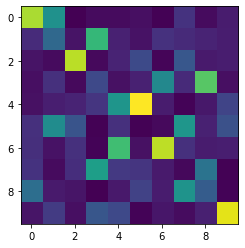

In [118]:
plt.imshow(np.abs(q0.T @ x0))

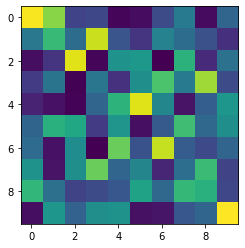

In [119]:
plt.imshow(np.abs(q0.T @ subspaces[0]))